* Authors: Andrea Jiménez Zuñiga, Valentina Díaz Torres e Isabel Afán de Ribera Olaso
* Date: 15/01/2021
* Institution: CUNEF

# 02. Feature Engineering Movie Recommendation System


#### Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import re # expresiones regulares, para eliminar el paréntesis en la columna titulo
pd.options.display.max_columns = None #para poder visualizar todas las columnas sin puntos suspensivos
pd.options.display.max_rows = None #para poder visualizar todas las filas sin puntos suspensivos
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import sys #connecting the notebooks

#### Import Data

At first we imported the entire data set provided by MovieLens which includes 25.000.095 ratings and 1.093.360 tag applications across 62.423 movies. Later on, we will work only with the most relevant ones for the analysis.

In [5]:
data_path = '../../data/data_movies.csv'

In [13]:
data_movies = pd.read_csv(data_path)
data_movies.head()
# Again we have a subsample ir order to be able to work with the dataset
data_movies2 = data_movies.head(10000000)

* #### __Number of Movies per Year :__

It is possible to visualize the number of movies per year. In the graph below we have represented the number of movies per year, in order to be able to determine the year in which there were more movies created.

In [7]:
data_movies.year.unique()


array([1.995e+03, 1.994e+03, 1.996e+03, 1.976e+03, 1.992e+03, 1.988e+03,
       1.967e+03, 1.993e+03, 1.964e+03, 1.977e+03, 1.965e+03, 1.982e+03,
       1.990e+03, 1.991e+03, 1.989e+03, 1.937e+03, 1.940e+03, 1.969e+03,
       1.981e+03, 1.973e+03, 1.970e+03, 3.010e+02, 1.960e+03, 1.955e+03,
       1.959e+03, 1.968e+03, 1.980e+03, 1.975e+03, 1.986e+03, 1.948e+03,
       1.943e+03, 1.950e+03, 1.946e+03, 1.987e+03, 1.997e+03, 1.974e+03,
       1.956e+03, 1.958e+03, 1.949e+03, 1.972e+03, 1.998e+03, 6.000e+00,
       1.933e+03, 1.952e+03, 1.951e+03, 1.957e+03, 1.961e+03, 1.954e+03,
       1.934e+03, 1.944e+03, 1.963e+03, 1.942e+03, 1.941e+03, 1.953e+03,
       1.939e+03, 1.947e+03, 1.945e+03, 1.938e+03, 1.935e+03, 1.936e+03,
       1.926e+03, 1.932e+03, 1.985e+03, 1.979e+03, 1.971e+03, 2.000e+00,
       1.978e+03, 1.966e+03, 1.962e+03, 1.983e+03, 1.984e+03, 8.000e+00,
       1.931e+03, 1.922e+03, 1.999e+03, 1.927e+03, 1.929e+03, 1.930e+03,
       1.928e+03, 1.925e+03, 1.914e+03, 2.000e+03, 

(1976.0, 1996.0)

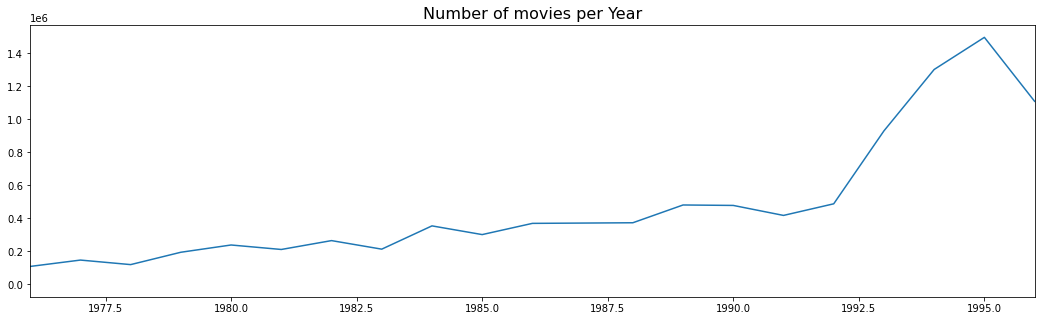

In [14]:
movies = data_movies
movies.title = movies.title.str[:-7]

plt.figure(figsize=(18,5))
plt.plot(movies.groupby(['year']).count()['title'])
plt.title('Number of movies per Year',fontsize=16)
plt.grid(False)
plt.xlim(1976, 1996)


It is noticed that the year of most movies made is 1995.   

### Data Cleaning

In order to see if we can dispense with some columns, we are going to analyse the null values of the 7 columns of our dataset.

In [15]:
# Percentage of missing values in each column

round((data_movies.isnull().sum()/len(data_movies)*100),2) #no null values in our dataset

movieId      0.00
title        0.05
genres       0.00
userId       0.00
rating       0.00
timestamp    0.00
year         0.05
dtype: float64

There are no missing values.

* __Encoding the genres :__

It is possible to encode the genres of the movies by onehot encoding, and show them as columns of our dataset. By doing this, we are getting distinct genre types for generating columns of genre type and then iterating over every list to create and fill values into columns. The values of each column are going to be 0 or 1, being 0 if that specific movie is not classified with that genre and 1 if that movie has that genre. 

In [16]:
data_movies.head()

,movieId,title,genres,userId,rating,timestamp,year
0,1,Toy,Adventure|Animation|Children|Comedy|Fantasy,2,3.5,1141415820,1995.0
1,1,Toy,Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1439472215,1995.0
2,1,Toy,Adventure|Animation|Children|Comedy|Fantasy,4,3.0,1573944252,1995.0
3,1,Toy,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,858625949,1995.0
4,1,Toy,Adventure|Animation|Children|Comedy|Fantasy,8,4.0,890492517,1995.0


In [17]:
onehot_genres = pd.concat([data_movies2.drop('genres', axis=1), data_movies2.genres.str.get_dummies(sep='|')], axis=1)  


In [18]:
onehot_genres.head()


,movieId,title,userId,rating,timestamp,year,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy,2,3.5,1141415820,1995.0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,Toy,3,4.0,1439472215,1995.0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,Toy,4,3.0,1573944252,1995.0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,Toy,5,4.0,858625949,1995.0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,Toy,8,4.0,890492517,1995.0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


* #### __Movie Ratings Histogram:__

In order to visualize a histogram of the movie ratings we need to turn to a dataframe the unique genres and represent the dataframe that contains the genres in oneHot encoding format. This dataset is _onehot_genres_ calculated earlier.

In [23]:
# Unique genres:

unique_genres = pd.DataFrame(data_movies2.genres.str.split('|').tolist()).stack().unique()
unique_genres = pd.DataFrame(unique_genres, columns=['genres'])

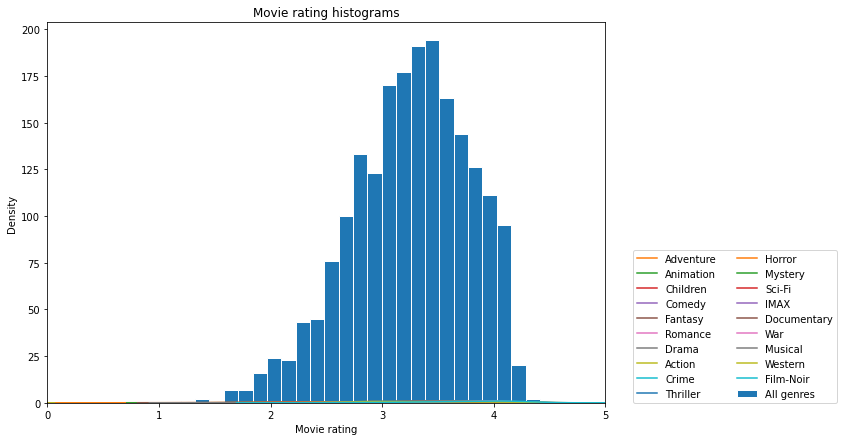

In [24]:
df0 = onehot_genres[['movieId','rating']].groupby('movieId').mean() # We calculate the mean of the coded genres 
                                                                    # and we group them by movieId.
df0.hist(bins=25, grid=False, edgecolor='w',label ='All genres', figsize=(10, 7))

for genres in unique_genres.genres:
    df0 = onehot_genres[onehot_genres[genres]==1] # We take the genres that are 1 
    df0 = df0[['movieId','rating']].groupby('movieId').mean() # We proceed to do the same as earlier but with 
                                                              # just the genres thata are = 1
    df0.rating.plot(grid=False,  kind='kde', label=genres) # We do the plot
    
plt.legend(loc=(1.05,0), ncol=2)
plt.xlim(0,5)
plt.xlabel('Movie rating')
plt.title('Movie rating histograms')
plt.show()

Since _IMAX_ is not a genre, but a visualization platform, we are going to delete it.

In [25]:
onehot_genres.drop('IMAX',axis=1,inplace=True)